# Day 1 part 1: Demonstration of a simple compartmental model

<div style="background: #f8f9fa; padding: 0.5rem 1rem; border-radius: 8px; margin-bottom: 1rem; border-left: 4px solid #007bff;">
<a href="../../index.ipynb" style="text-decoration: none; color: #007bff; font-weight: bold;">← Back to Course Index</a> | 
<a href="../../index-tr.ipynb" style="text-decoration: none; color: #dc3545; font-weight: bold;">🇹🇷 Türkçe Index</a>
</div>

---

In our previous sessions we have reviewed how compartmental models can be used to describe infectious diseases. We have also examined how to specify rates of transition, its relation with time distributions and the how we interpret simple modelling output. During this first practical we will first see how a simple cohort model is coded, and will also examine testing the basic assumptions of the model.

## 1. A simple cohort model

Remember the cohort model we have studied, where we start with an initial population of infected individuals and we allow a transition into recovery. Let us see what are the basic building blocks of that model.

In [1]:

# Load some useful packages:
library(deSolve)  # To solve differential equations 
library(reshape2) # To To manipulate our model output
library(ggplot2)  # To produce nice plots!
library(here)     # To ensure that we always are in our working directory


###################
#  Now let's code our  cohort model 

# We will call our tota population N. Let's create a parameter for N
N <- 1000

### Some model inputs

# Initial conditions: The cohort mode we want to code has two satges, I Infected  and R (recovered) 

# Lets create a vector that contains the state variables of the model

initial_state_values <- c(
                          I = N,
                          R = 0)           

# Note that we assign we assign initial values to model compartments I and R

# Parameter values per day: We now that the infectious period is on average 2 days
# According to that we can express the recovery rate (gamma) as follows:

parameters <- c(gamma = 1/2)


# TIMESTEPS:

# This is a Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 50, by = 1)   # from 0 to 50 days in daily intervals


### Now code the model ! 

## ODEs 
# The model function below takes as input arguments 
# (in the following order): time, state and parameters
# Note how the differential equations are coded and compare to your notes ! 

cohort_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {     
    
    # Calculating the total population size N (the sum of the number of people in each compartment)
    N <- I+R
    
    # The differential equations
    dI  <- -gamma * I     
    dR <- gamma * I

    return(list(c(dI, dR))) 
  })
  
}


here() starts at C:/Users/juano/Dropbox/Code/Git/ankara-modelling-2025-notebooks



### 1.1 Running the cohort model

We have coded a simple cohort model with compartments I and R, initial conditions for those staes and also have defined the transition parameter gamma to reflect recovery rate.

Now let's run the model and see some output:

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


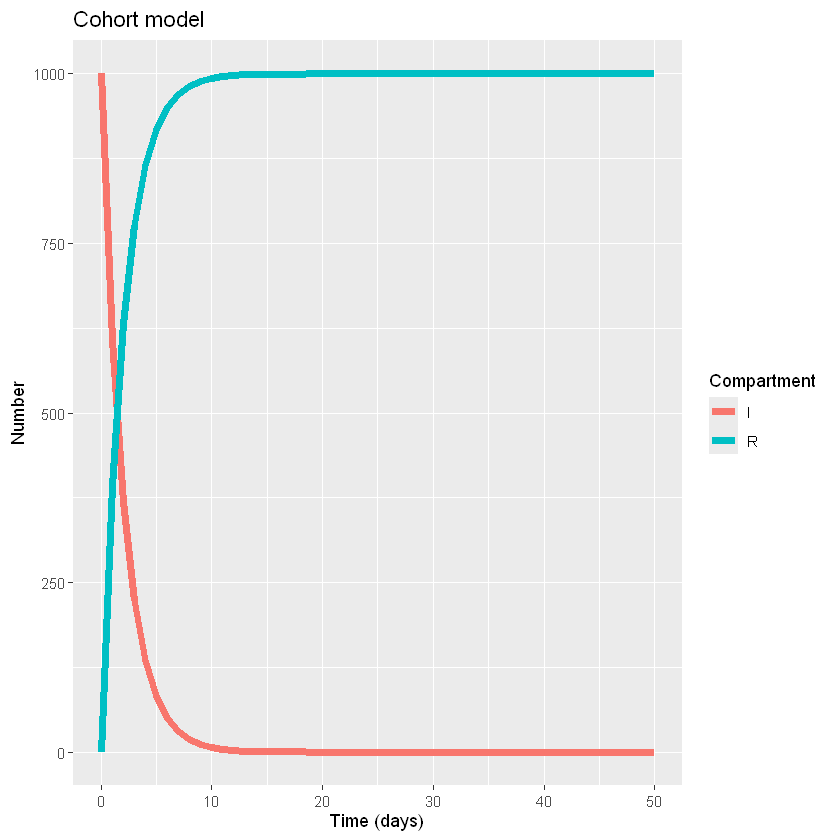

In [2]:
## MODEL OUTPUT (Solving the differential equations using the ode integration algorithm)

# We use the function ode (from deSolve package) and pass the system and parameters 
# that we have created above

# The model output will be stored in the data frame output1

output1 <- as.data.frame(ode(y = initial_state_values, 
                             times = times, 
                             func = cohort_model,
                             parms = parameters))

# Let's give the output a look by typing output1 in the console

# You see that each state variable (I and R) have each one a column
# For plotting this results we what we call long format, so let's use the rehsape 
# package and function "melt" to get our output in that format

# turn output data set into long format
output1_long <- melt(as.data.frame(output1), id = "time")                  

# Let's give the output a look by typing output1_long in the console


## Plot model out

# Plot the number of people in the I and R compartments over time
ggplot(data = output1_long,                                              # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line(size=2) +                                                    # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number") +                                                       # add label for y axis
  labs(colour = "Compartment",                                           # add legend title  
  title = "Cohort model")  





Task: Using the code above explore running the same model but now imagine a scenario where the mean infectious period in our cohort is 10 days instead of two days. Can you explain why the plot looks different?

### Solution

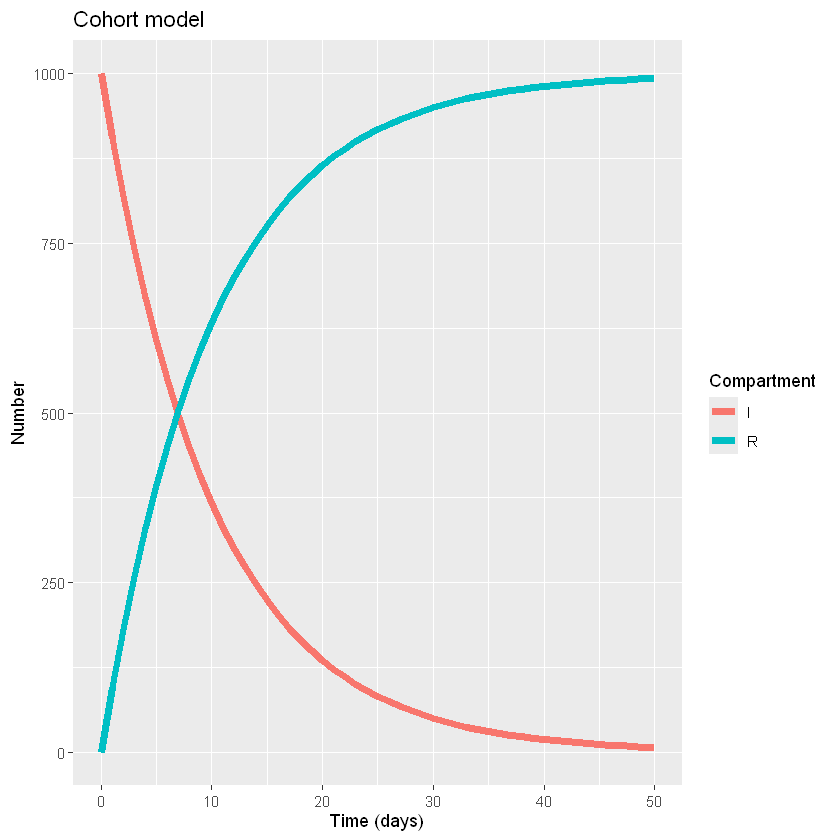

In [3]:

# Tip: change gamma top 10 days as a rate 

parameters <- c(gamma = 1/10)

# Run again 
output1 <- as.data.frame(ode(y = initial_state_values, 
                             times = times, 
                             func = cohort_model,
                             parms = parameters))

# Let's give the output a look by typing output1 in the console

# You see that each state variable (I and R) have each one a column
# For plotting this results we what we call long format, so let's use the rehsape 
# package and function "melt" to get our output in that format

# turn output data set into long format
output1_long <- melt(as.data.frame(output1), id = "time")                  

# Let's give the output a look by typing output1_long in the console


## Plot model out

# Plot the number of people in the I and R compartments over time
ggplot(data = output1_long,                                              # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line(size=2) +                                                    # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number") +                                                       # add label for y axis
  labs(colour = "Compartment",                                           # add legend title  
  title = "Cohort model")  





This plot basically reflects the fact that the recovery time (gamma) is longer now (10 days, instead of two). Hence, the decay of "I" and rise of "R" is less sharp.